# Mapping Using ggmap and ggplot


This notebook will create some basic maps using ggmap and ggplot libraries in R.  

We'll start with mapping visitors to the U.S. 


In [2]:
# First, read the data and make sure the first column is character and the rest is numeric

vis <- read.csv("../../../datasets/spatial/US_visitors.csv",colClasses=c("character",rep("numeric",10)))
head(vis)
str(vis)

Region,X2006,X2007,X2008,X2009,X2010,X2011,X2012,X2013,X2014,X2015
Africa,394163,426922,474160,452693,485110,508489,573184,645919,757181,792026
Asia,8371244,8781480,8795236,7820986,9404375,10027386,11062760,12230911,13307053,14025173
Europe,12792122,13993051,15931641,14559083,14692093,15481558,15710015,16167460,17376449,17340542
North America,8491307,9963858,9832557,8963282,16449861,20940354,19996738,24561055,35589531,36312759
Oceania,1039872,1067258,1127444,1065909,1290993,1513963,1618337,1770569,1822066,1859507
South America,2432010,2763355,3039883,3075013,3587883,4126385,4651162,5511558,6052610,6256760


'data.frame':	6 obs. of  11 variables:
 $ Region: chr  "Africa" "Asia" "Europe" "North America" ...
 $ X2006 : num  394163 8371244 12792122 8491307 1039872 ...
 $ X2007 : num  426922 8781480 13993051 9963858 1067258 ...
 $ X2008 : num  474160 8795236 15931641 9832557 1127444 ...
 $ X2009 : num  452693 7820986 14559083 8963282 1065909 ...
 $ X2010 : num  485110 9404375 14692093 16449861 1290993 ...
 $ X2011 : num  508489 10027386 15481558 20940354 1513963 ...
 $ X2012 : num  573184 11062760 15710015 19996738 1618337 ...
 $ X2013 : num  645919 12230911 16167460 24561055 1770569 ...
 $ X2014 : num  757181 13307053 17376449 35589531 1822066 ...
 $ X2015 : num  792026 14025173 17340542 36312759 1859507 ...


We will create a **flow map** to visualize number of visitors from different continents. For that, we'll need coordinates. *ggmap* library has functions to look up for *geocodes* of locations; these locations can be addresses, city names, or even continent names. 
Let's lookup continents' coordinates information by using *mutate_geocode* function that will augment our data frame.

In [3]:
library(ggplot2)
library(ggmap)

# geo coordinates lookup for the place names in the Region attribute 
vis <- mutate_geocode(vis, Region)
head(vis)
# get the map 
world <- map_data("world")
head(world)

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Africa&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Asia&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Europe&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=North%20America&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Oceania&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=South%20America&sensor=false


Region,X2006,X2007,X2008,X2009,X2010,X2011,X2012,X2013,X2014,X2015,lon,lat
Africa,394163,426922,474160,452693,485110,508489,573184,645919,757181,792026,34.50852,-8.783195
Asia,8371244,8781480,8795236,7820986,9404375,10027386,11062760,12230911,13307053,14025173,100.61966,34.047863
Europe,12792122,13993051,15931641,14559083,14692093,15481558,15710015,16167460,17376449,17340542,15.25512,54.525961
North America,8491307,9963858,9832557,8963282,16449861,20940354,19996738,24561055,35589531,36312759,-105.25512,54.525961
Oceania,1039872,1067258,1127444,1065909,1290993,1513963,1618337,1770569,1822066,1859507,140.01877,-22.735910
South America,2432010,2763355,3039883,3075013,3587883,4126385,4651162,5511558,6052610,6256760,-55.49148,-8.783195


long,lat,group,order,region,subregion
-69.89912,12.45200,1,1,Aruba,NA
-69.89571,12.42300,1,2,Aruba,NA
-69.94219,12.43853,1,3,Aruba,NA
-70.00415,12.50049,1,4,Aruba,NA
-70.06612,12.54697,1,5,Aruba,NA
-70.05088,12.59707,1,6,Aruba,NA


In [3]:
# get coordinates for US 
# Useful libraries to visualize maps 
library(ggplot2)
library(sp)
library(maps)
library(maptools)
library(mapproj)
library(mapdata)
us <- geocode("United States")
head(us)

Checking rgeos availability: TRUE
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false


lon,lat
-95.71289,37.09024


Now I'll create a flow map that shows the number of visitors to US from different continents. We'll want to make sure color encodes region and size encodes number of visitors in 2015.

Warning message:
“Ignoring unknown aesthetics: x, y”

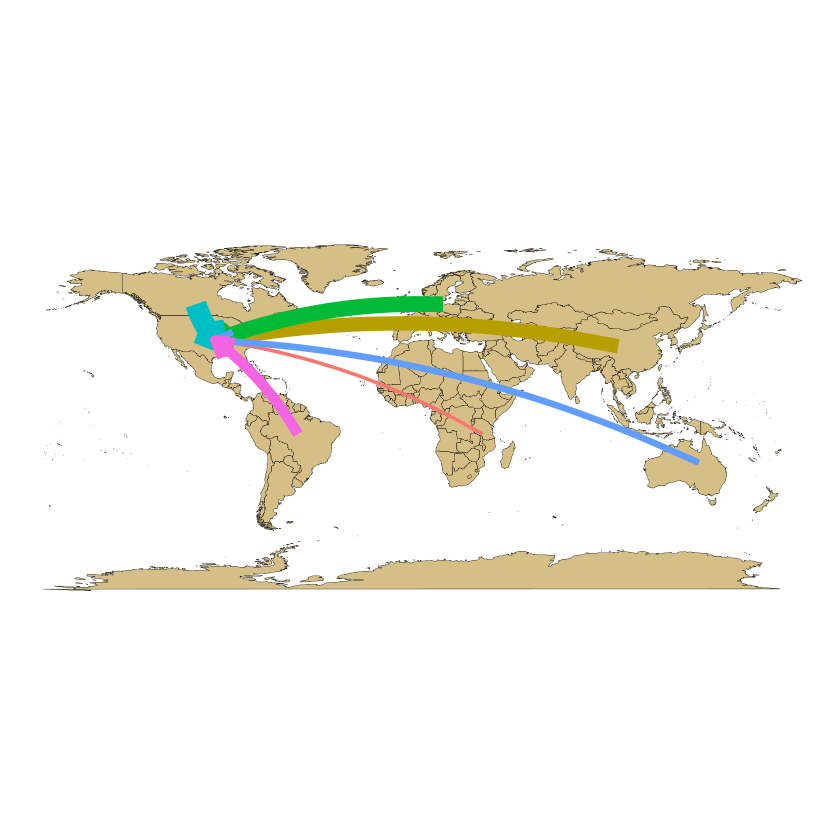

In [4]:
# Now first plot the world map 
ggplot() +geom_map(data=world, map=world, aes(long, lat, map_id=region), color="black", fill="#d6bf86", size=0.1) +
# then plot the flow curves from continents to the same point in US. 
geom_curve(data=vis, aes(x=lon, y=lat, xend=us$lon, yend=us$lat, color=Region, size=X2015), 
           curvature=0.1, arrow=arrow(length=unit(0.05, "npc"))) +
# add coords themes etc. 
coord_equal() +
theme_void() + theme(legend.position="None")

All flow curves end at the same point in US and get superposed. Instead of using a single endpoint, let's use multiple endpoints in US to make it look better. Go to [latlong.net](http://www.latlong.net/) and choose good endpoints for each continent, and then add their coordinates to your data frame A ENDLON AND ENDLAT attributes and redraw. 

In [5]:
city <- c('washington','new york','chicago', 'seatle', 'la', 'dallas')
lat <- c(38.907192, 40.712784, 41.878114, 47.606209, 34.052234, 32.776664)
lon <- c(-77.036871, -74.005941, -87.629798, -122.332071, -118.243685, -96.796988)

end <- data.frame(city, lat, lon)
head(end)

city,lat,lon
washington,38.90719,-77.03687
new york,40.71278,-74.00594
chicago,41.87811,-87.62980
seatle,47.60621,-122.33207
la,34.05223,-118.24368
dallas,32.77666,-96.79699


Warning message:
“Ignoring unknown aesthetics: x, y”

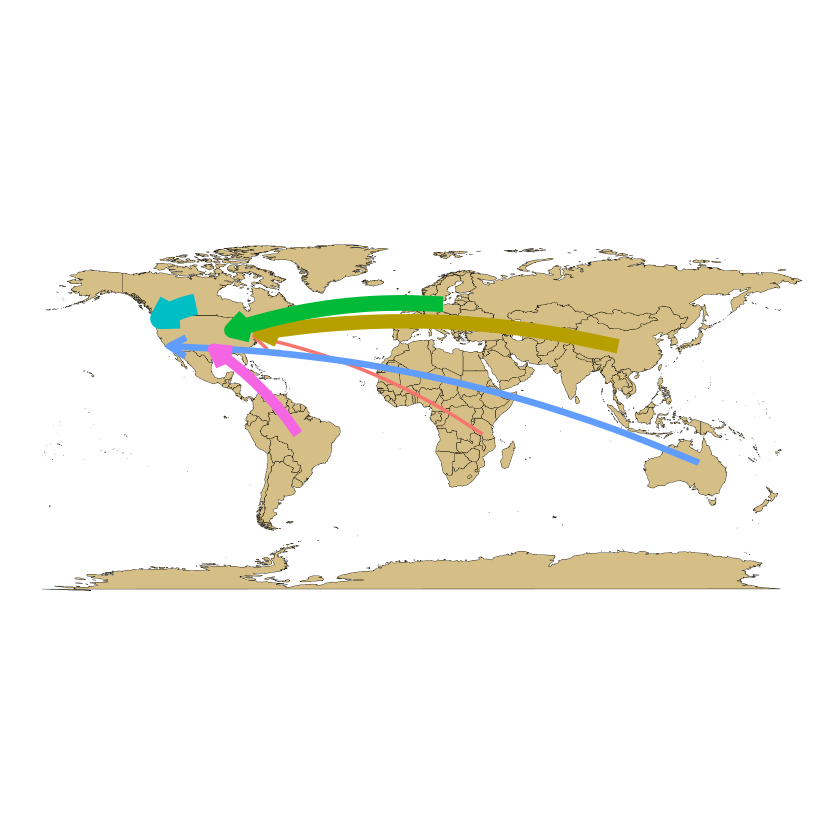

In [9]:
# Now first plot the world map 
ggplot() +geom_map(data=world, map=world, aes(long, lat, map_id=region), color="black", fill="#d6bf86", size=0.1) +
# then plot the flow curves from continents to the same point in US. 
geom_curve(data=vis, aes(x=lon, y=lat, xend=end$lon, yend=end$lat, color=Region, size=X2015), 
           curvature=0.1, arrow=arrow(length=unit(0.05, "npc"))) +
# add coords themes etc. 
coord_equal() +
theme_void() + theme(legend.position="None")

Now, we will work with some flight data and visualize flights. Let's get the data first. 

In [6]:
library(dplyr)
library(sp)
library(geosphere)

# airport codes and coordinates 
airports <- read.csv("../../../datasets/spatial/airports.csv", as.is=TRUE, header=TRUE)
# flight destinations and counts 
flights <- read.csv("../../../datasets/spatial/flights.csv", as.is=TRUE, header=TRUE)
airports$lat <- as.numeric(airports$lat)
airports$long <- as.numeric(airports$long)
# get airport locations
airport_locs <- airports[, c("iata","long", "lat")]

# Link airport lat long to origin and destination
OD <- left_join(flights, airport_locs, by=c("airport1"="iata"))
OD <- left_join(OD, airport_locs, by=c("airport2"="iata"))
head(OD)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

airline,airport1,airport2,cnt,long.x,lat.x,long.y,lat.y
AA,DFW,SJU,120,-97.03720,32.89595,-66.00183,18.43942
AA,MSP,DFW,326,-93.21692,44.88055,-97.03720,32.89595
AA,LGA,ORD,860,-73.87261,40.77724,-87.90446,41.97960
AA,TPA,JFK,56,-82.53325,27.97547,-73.77893,40.63975
AA,STT,BOS,44,-64.97336,18.33731,-71.00518,42.36435
AA,PHX,DFW,550,-112.00806,33.43417,-97.03720,32.89595


Now I'll add another attribute to the OD data frame that shows the distance between two airports and visualize only those routes that are longer than 500 miles. 

In [7]:
# This is how we find the geodesic distance between two pairs of coordinates using geosphere library
# Compute the geodesic distance between airports 
dd <- data.frame(Distance=distGeo(matrix(c(OD$long.x, OD$lat.x), ncol = 2), matrix(c(OD$long.y, OD$lat.y), ncol = 2)))
# convert meters to miles 
dd <- dd*0.000621371 
# Now add this to the OD data frame as another attribute and visualize only those routes that are longer than 500 miles. 

OD$Distance <- dd 

long_flights <- subset(OD, OD$Distance > 500)
head(long_flights)

Warning message:
“Ignoring unknown aesthetics: x, y”Warning message:
“Removed 4 rows containing missing values (geom_curve).”

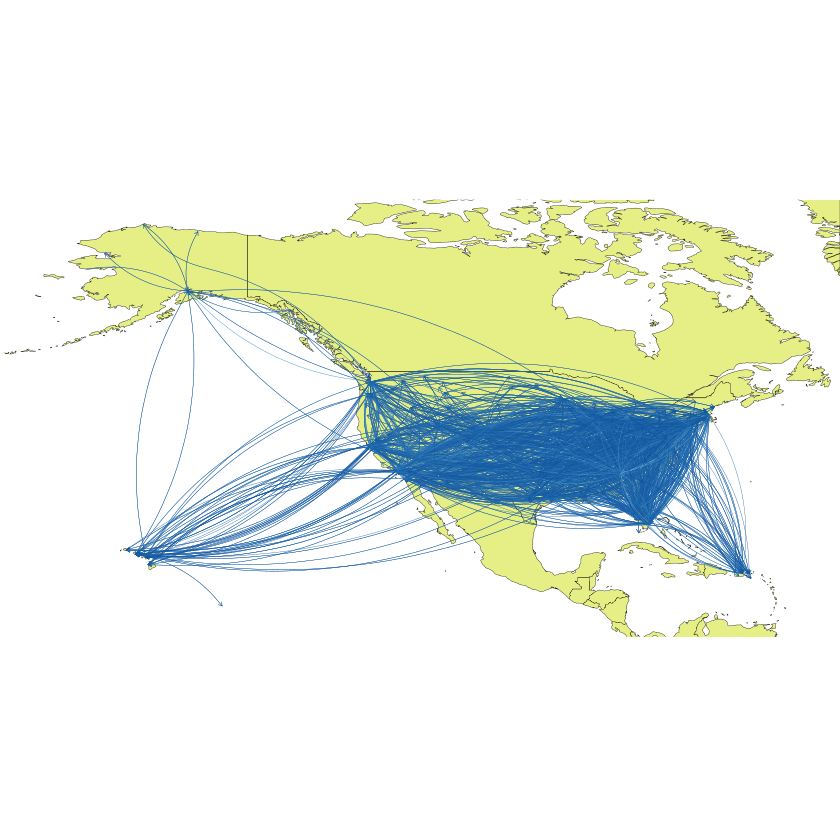

In [8]:
ggplot() + 
geom_map(data=world,map=world, aes(long, lat, map_id=region), fill="#e6ef86", color="black", size=0.1) +

geom_curve(data=long_flights, aes(x=long.x, y=lat.x, xend=long.y, yend=lat.y, color=cnt), size=0.1,
                 curvature=-0.2, arrow=arrow(length=unit(0.01, "npc"))) +
    
scale_colour_distiller(palette="Blues", guide="none") +
coord_equal() +
xlim(c(-172,-57)) + ylim(c(12,72)) + 
theme_void()

Let's move on to something new.  We'll show population by counties.  For this we'll read the Missouri County population data set and create a choropleth map that shows the population in year 2000 county by county. 

In [9]:
moco <- read.csv("../../../datasets/spatial/MO_2009_County.csv")

head(moco)

COUNTYNAME,COUNTYFIPS,COUNTYGNIS,POP_1990,POP_2000,ACRES,SQ_MILES,CNTY_SEAT
Clark,45,758477,7547,7416,327632.4,511.9257,Kahoka
Atchison,5,758457,7457,6430,351990.5,549.9852,Rock Port
Scotland,199,758552,4822,4983,280949.0,438.9828,Memphis
Schuyler,197,758551,4236,4170,197084.7,307.9449,Lancaster
Nodaway,147,758528,21709,21912,561734.1,877.7095,Maryville
Putnam,171,758540,5079,5223,332103.3,518.9114,Unionville


In [10]:
# The folllowing is in order to create a "region" common id.
# Get the Missouri counties map and rename the county column to "region"
mo_map <- map_data("county","missouri")
mo_map <- mo_map[ ,-5]
names(mo_map)[5] <- 'region'

# make the county names lowercase
moco <- mutate(moco, region = tolower(COUNTYNAME))
head(moco)

COUNTYNAME,COUNTYFIPS,COUNTYGNIS,POP_1990,POP_2000,ACRES,SQ_MILES,CNTY_SEAT,region
Clark,45,758477,7547,7416,327632.4,511.9257,Kahoka,clark
Atchison,5,758457,7457,6430,351990.5,549.9852,Rock Port,atchison
Scotland,199,758552,4822,4983,280949.0,438.9828,Memphis,scotland
Schuyler,197,758551,4236,4170,197084.7,307.9449,Lancaster,schuyler
Nodaway,147,758528,21709,21912,561734.1,877.7095,Maryville,nodaway
Putnam,171,758540,5079,5223,332103.3,518.9114,Unionville,putnam


In [11]:
head(mo_map)

long,lat,group,order,region
-92.67592,40.35342,1,1,adair
-92.33215,40.35342,1,2,adair
-92.33215,40.35342,1,3,adair
-92.33215,40.31331,1,4,adair
-92.33215,40.04402,1,5,adair
-92.84208,40.03829,1,6,adair


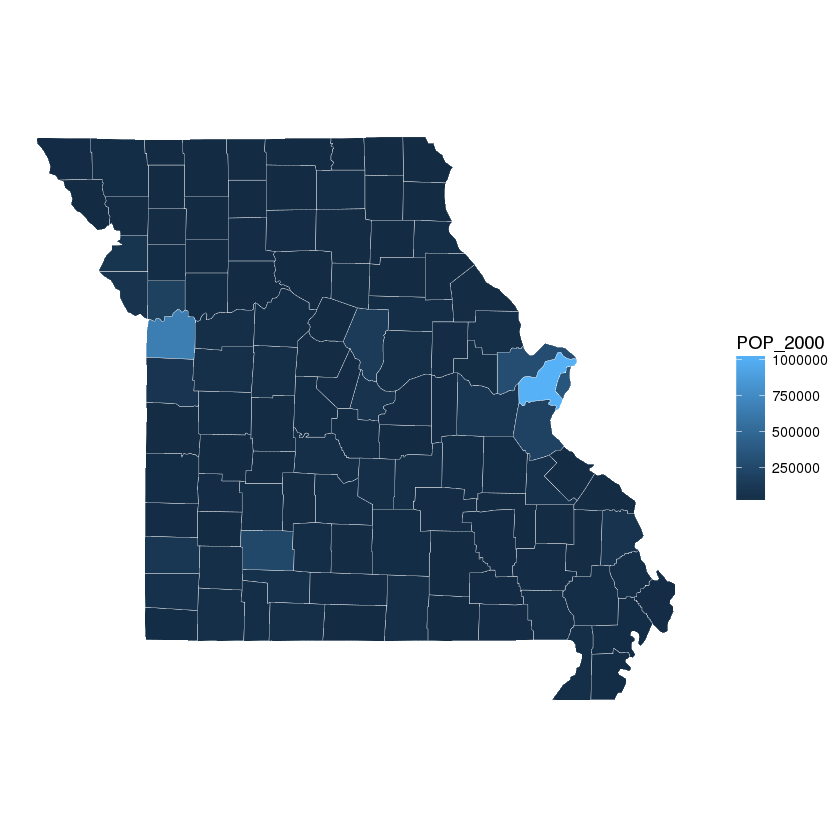

In [12]:
ggplot(data=moco, aes(fill=POP_2000)) +

geom_map(map=mo_map, aes(map_id=region), color="white", size=0.1) +

# mapping stuff
expand_limits(x = mo_map$long, y = mo_map$lat) +
coord_map() + 
theme_void()

Now we'll move on to another example mapping retail stores.  We'll work with Walmart stores because their data is easy to find. 

Let's read the Walmart store opening data, and create a density map out of it. I'll get a Texas map from Google Maps, then create a density plot and its borders as layers on the map. Finally I'll add store locations as another layer encoded by blue dots. 

In [13]:
# grab the data 
df <- read.csv('https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv')
head(df)

storenum,OPENDATE,date_super,conversion,st,county,STREETADDR,STRCITY,STRSTATE,ZIPCODE,type_store,LAT,LON,MONTH,DAY,YEAR
1,7/1/62,3/1/97,1,5,7,2110 WEST WALNUT,Rogers,AR,72756,Supercenter,36.34224,-94.07141,7,1,1962
2,8/1/64,3/1/96,1,5,9,1417 HWY 62/65 N,Harrison,AR,72601,Supercenter,36.23698,-93.09345,8,1,1964
4,8/1/65,3/1/02,1,5,7,2901 HWY 412 EAST,Siloam Springs,AR,72761,Supercenter,36.17990,-94.50208,8,1,1965
8,10/1/67,3/1/93,1,5,29,1621 NORTH BUSINESS 9,Morrilton,AR,72110,Supercenter,35.15649,-92.75858,10,1,1967
7,10/1/67,,NA,5,119,3801 CAMP ROBINSON RD.,North Little Rock,AR,72118,Wal-Mart,34.81327,-92.30229,10,1,1967
10,7/1/68,3/1/98,1,40,21,2020 SOUTH MUSKOGEE,Tahlequah,OK,74464,Supercenter,35.92366,-94.97185,7,1,1968


Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”Warning message:
“Removed 2733 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 2733 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 2733 rows containing missing values (geom_point).”

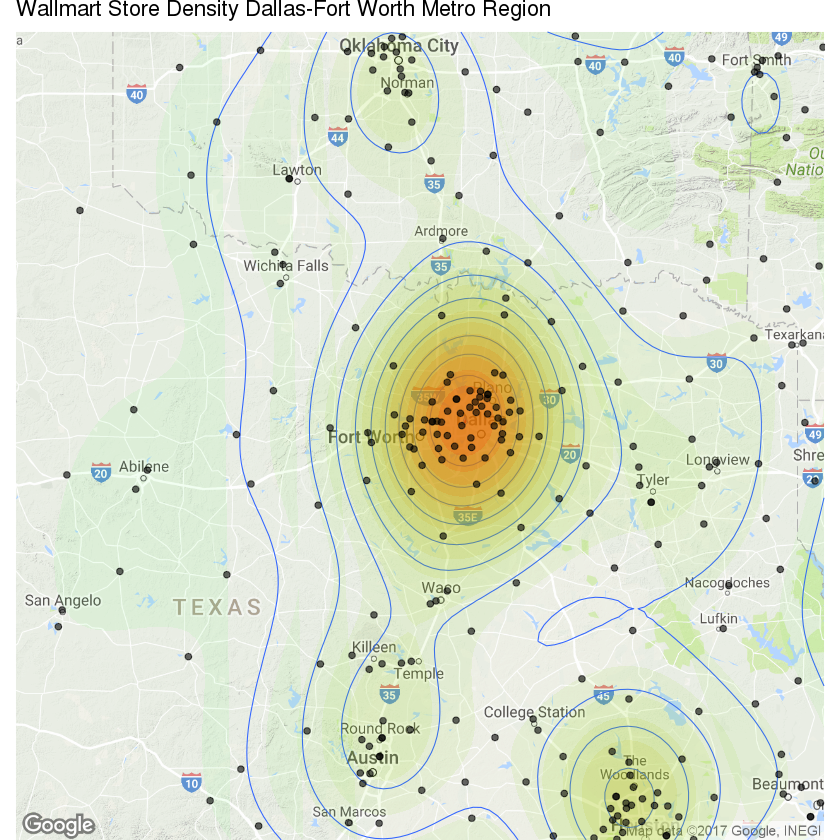

In [14]:
TX <- suppressMessages(get_map("Fort Worth", zoom = 7))

TXmap <- ggmap(TX, extent = "device", darken = c(.2,"white"))

TXmap + 

geom_density2d(data = df, aes(x = LON, y = LAT), size = 0.3) + 

stat_density2d(data = df, aes(x = LON, y = LAT, fill = ..level.., alpha = ..level..), size = 0.01, bins = 16, geom = "polygon") + 

scale_fill_gradient("Wallmart\nStores",low = "green", high = "red") + 

scale_alpha(range = c(0.05, 0.2), guide = FALSE) +

# add store locations here so that they are on top 
geom_point(aes(x = LON, y = LAT), data = df, alpha=0.6) +

# remove the legend 
theme(legend.position="None") + 

ggtitle("Wallmart Store Density Dallas-Fort Worth Metro Region") 

We'll do the same thing here except we'll use vehicle theft data. I'll plot the densities of all data points for all years on the same map. 

ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude
8951354,12/31/2012 23:15,STREET,FALSE,FALSE,623,6,69,2012,41.75628,-87.62164
8951141,12/31/2012 22:00,STREET,FALSE,FALSE,1213,12,24,2012,41.89879,-87.66130
8952745,12/31/2012 22:00,RESIDENTIAL YARD (FRONT/BACK),FALSE,FALSE,1622,16,11,2012,41.96919,-87.76767
8952223,12/31/2012 22:00,STREET,FALSE,FALSE,724,7,67,2012,41.76933,-87.65773
8951608,12/31/2012 21:30,STREET,FALSE,FALSE,211,2,35,2012,41.83757,-87.62176
8950793,12/31/2012 20:30,STREET,TRUE,FALSE,2521,25,19,2012,41.92856,-87.75400


Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”

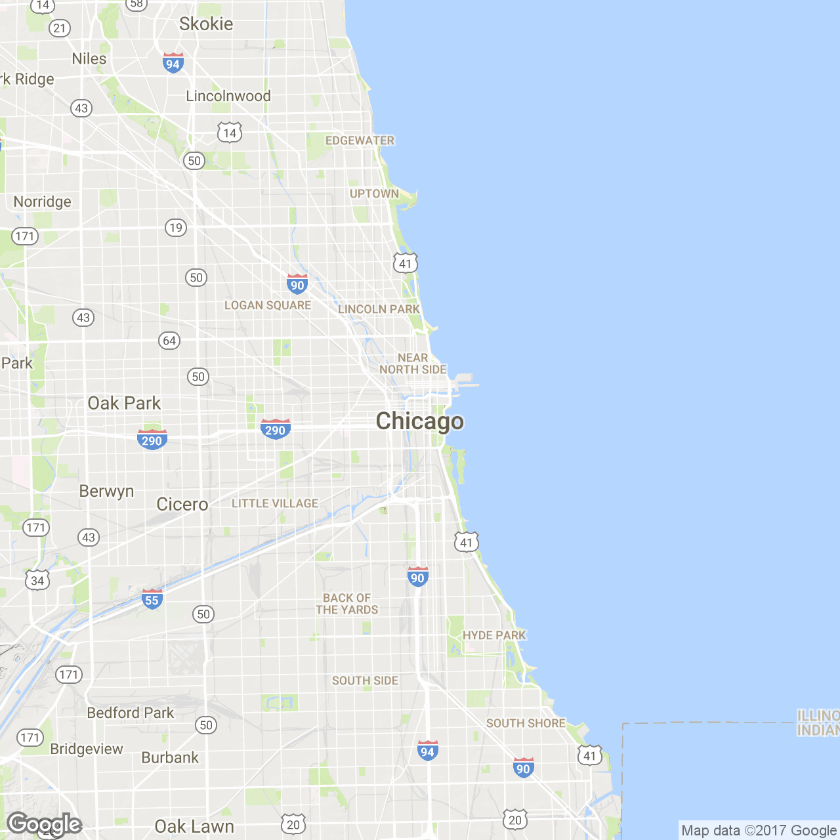

In [15]:
df <-read.csv("../../../datasets/motor_vehicle_thefts/mvt.csv")
head(df)

# Get the Google Map tile at zoom level 11 for Chicago
Chicago <- suppressMessages(get_map("Chicago", zoom = 11))

Chicago_map <- ggmap(Chicago, extent = "device", darken = c(.2,"white")) 

# view our map 
Chicago_map

Warning message:
“Removed 13308 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 13308 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 13308 rows containing missing values (geom_point).”

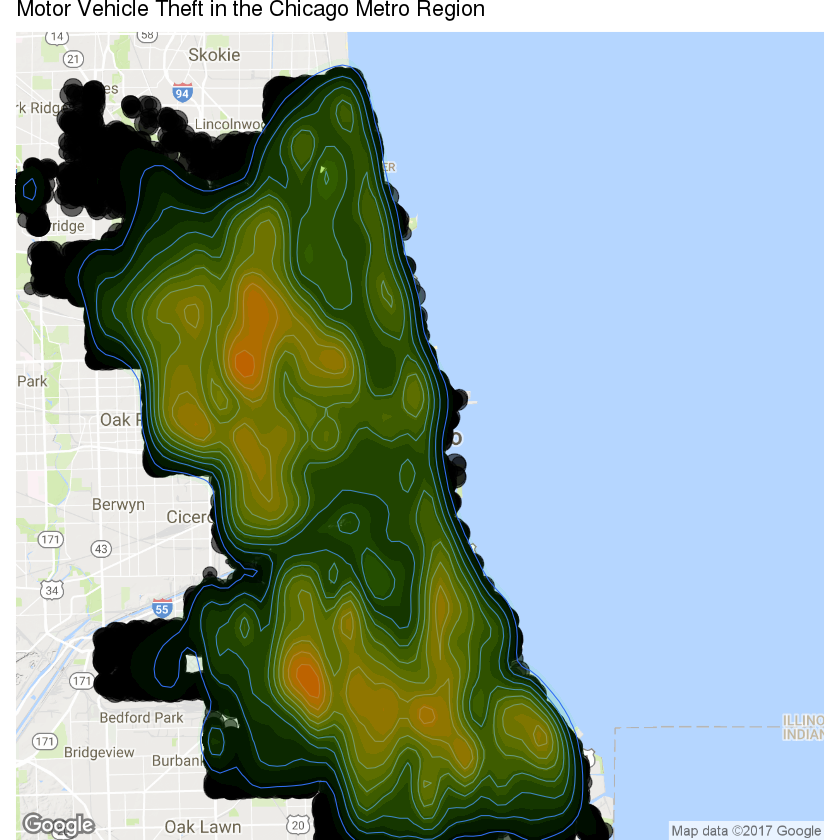

In [17]:
Chicago_map + # add store locations here so that they are on top 
geom_point(aes(x = Longitude, y = Latitude, size = Year), data = df, alpha=0.1) +

geom_density2d(data = df, aes(x = Longitude, y = Latitude), size = 0.3) + 

stat_density2d(data = df, aes(x = Longitude, y = Latitude, fill = ..level.., alpha = ..level..), size = 0.01, bins = 16, geom = "polygon") + 

scale_fill_gradient("Motor\nVehicle\nTheft",low = "green", high = "red") + 

scale_alpha(range = c(0.05, 0.2), guide = FALSE) +

# remove the legend 
theme(legend.position="None") + 

ggtitle("Motor Vehicle Theft in the Chicago Metro Region") 

Now time to clean this map up just a bit so we can share it with others. 

Warning message:
“Removed 13308 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 13308 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 13308 rows containing missing values (geom_point).”

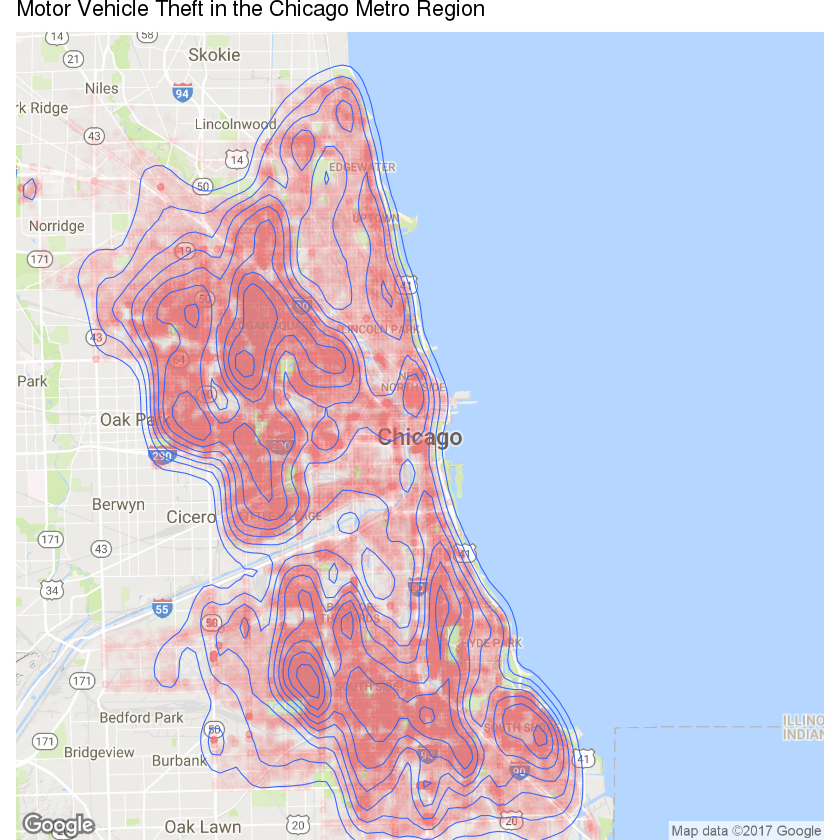

In [28]:
Chicago_map + # add store locations here so that they are on top 
geom_point(data = df, aes(x = Longitude, y = Latitude), color = "coral1", position=position_jitter(), alpha=0.01) +

geom_density2d(data = df, aes(x = Longitude, y = Latitude), size = 0.3) + 

stat_density2d(data = df, aes(x = Longitude, y = Latitude, fill = ..level.., alpha = ..level..), size = 0.01, bins = 16, geom = "polygon") + 

scale_alpha(range = c(0.001, 0.01), guide = FALSE) +

# remove the legend 
theme(legend.position="None") + 

ggtitle("Motor Vehicle Theft in the Chicago Metro Region") 